In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

# Задание 1

In [42]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

A)

In [42]:
man = raitings[1]

In [50]:
def similarity(man):
    alfa_list = []
    for r in raitings:
        alfa = np.rad2deg(np.arccos(np.dot(man, r) / (np.linalg.norm(man) * np.linalg.norm(r))))
        alfa_list.append(alfa)
    similar_deegre = sorted(alfa_list)[1]
    similar_man = alfa_list.index(similar_deegre) + 1
    return similar_man

In [55]:
i = 1
results = []
for man in raitings:
    result = []
    a = similarity(man)
    result.append(i)
    result.append(a)            
    results.append(result)
    i += 1
results

<ipython-input-50-75c71c420a70>:4: RuntimeWarning: invalid value encountered in arccos
  alfa = np.rad2deg(np.arccos(np.dot(man, r) / (np.linalg.norm(man) * np.linalg.norm(r))))


[[1, 9],
 [2, 5],
 [3, 10],
 [4, 10],
 [5, 9],
 [6, 10],
 [7, 4],
 [8, 10],
 [9, 1],
 [10, 3]]

Б) Как один из вариантов можно применить метод анализа главных комопнент. Суть метода заключается в понижениии размерности матрицы, путем нахождения собственных значений в её ковариционной матрице, взяв за новый базис n чилсо наибольших из них (предварительно отнормировав их). Далее n собсвенными векторами проецируем данные на новое  n - подпростарнство. Допусти с фильмами, мы имеем 15 признаков, и с помощью метода главных компонентов, мы получили собственные значения. Берём 5 наиболее крупных(сумарно они должны быть более 80%) и с помощью линейного опреартора сотавлем новоую матрицу, только уже меньшей размерности. При этом потеря так как в новом базисе пристусвеют наиболее значительные собственные векторы

# Задание 2

In [56]:
import sympy as sym
from scipy.misc import derivative
def f(t):
    return np.tan(np.sin(t)+np.cos(2*t+3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

# Задание 3

In [22]:
from scipy.optimize import differential_evolution

In [3]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [4]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [5]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

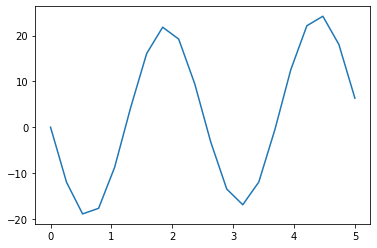

In [6]:
plt.plot(x, fx)
plt.show()

In [7]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [28]:
x0 = np.random.uniform(low=0,high=2,size=(2,))
x0

array([0.67934184, 1.91232062])

In [29]:
res2 = minimize(error, x0,  method='nelder-mead',options={'disp':True})

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 111
         Function evaluations: 215


In [38]:
bounds = [(-5, 5), (-5, 5)]
res = differential_evolution(error, bounds, seed=21)

In [39]:
res.x

array([ 3. , -2.5])

In [40]:
res

     fun: 1.5116888922861449e-06
 message: 'Optimization terminated successfully.'
    nfev: 1983
     nit: 63
 success: True
       x: array([ 3. , -2.5])

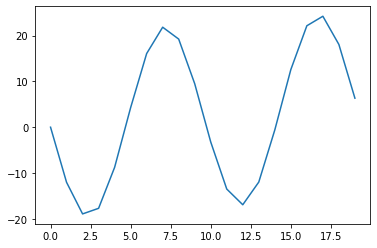

In [41]:
plt.plot(f(x, res.x[0], res.x[1]))

# Задание 4

In [62]:
elem = [7, 12, 2, 9, 15, 1]
prob = [0.05, 0.15, 0.3, 0.2, 0.2, 0.1]

In [63]:
np.random.choice(elem, 20, p=prob)

array([ 9,  2,  2,  2, 15,  2, 12,  9, 12, 12,  9, 12,  2,  2,  2,  9,  9,
       12,  2,  2])

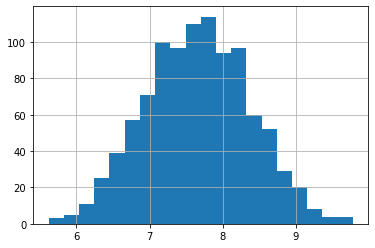

In [72]:
mList=[];
for kk in range(1000):
    data = np.random.choice(elem, 50, p=prob)
    mList.append(data.mean())
plt.hist(x=mList, bins=20)
plt.grid()
plt.show()

# Задание 5

In [73]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [75]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))